Well log data and Well trajectory visualization

In [ ]:
#installing the required libraries
!pip install lasio #for las files

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 1.4 MB/s eta 0:00:00


In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import lasio

In [ ]:
# Data links
well_path = "http://bit.ly/wireline-data"
trajectory_path = "http://bit.ly/trajectory-data"

In [ ]:
#reading well log data
well=lasio.read(well_path)

In [ ]:
#displaying the data
well.data

array([[4.93493134e+02,            nan, 1.94060001e+01, ...,
        1.54602885e+00,            nan, 1.54602885e+00],
       [4.93645538e+02,            nan, 1.94060001e+01, ...,
        1.57003009e+00,            nan, 1.57003009e+00],
       [4.93797943e+02,            nan, 1.94060001e+01, ...,
        1.59499407e+00,            nan, 1.59499407e+00],
       ...,
       [3.75226196e+03,            nan, 7.55499983e+00, ...,
        3.15799999e+00,            nan, 3.15799999e+00],
       [3.75241431e+03,            nan, 7.55499983e+00, ...,
        3.15799999e+00,            nan, 3.15799999e+00],
       [3.75256665e+03,            nan, 7.55499983e+00, ...,
        3.15799999e+00,            nan, 3.15799999e+00]])

In [ ]:
#displaying mnemonics
well.curves

[CurveItem(mnemonic="DEPT", unit="m", value="", descr="DEPTH", original_mnemonic="DEPT", data.shape=(21386,)),
 CurveItem(mnemonic="LITHOLOGY_GEOLINK", unit="_", value="", descr="Lithology_geolink", original_mnemonic="LITHOLOGY_GEOLINK", data.shape=(21386,)),
 CurveItem(mnemonic="CALI", unit="in", value="", descr="CALI", original_mnemonic="CALI", data.shape=(21386,)),
 CurveItem(mnemonic="DRHO", unit="g/cm3", value="", descr="DRHO", original_mnemonic="DRHO", data.shape=(21386,)),
 CurveItem(mnemonic="NPHI", unit="m3/m3", value="", descr="NPHI", original_mnemonic="NPHI", data.shape=(21386,)),
 CurveItem(mnemonic="RHOB", unit="g/cm3", value="", descr="RHOB", original_mnemonic="RHOB", data.shape=(21386,)),
 CurveItem(mnemonic="GR", unit="gAPI", value="", descr="GR", original_mnemonic="GR", data.shape=(21386,)),
 CurveItem(mnemonic="DTC", unit="us/ft", value="", descr="DTC", original_mnemonic="DTC", data.shape=(21386,)),
 CurveItem(mnemonic="DTE", unit="us/ft", value="", descr="DTE", origi

In [ ]:
#converting into a dataframe
well.df().reset_index()

,DEPT,LITHOLOGY_GEOLINK,CALI,DRHO,NPHI,RHOB,GR,DTC,DTE,RDEP,SP,RSHA,RXO,RMED
0,493.493134,NaN,19.406000,-0.708,NaN,1.789,64.497482,167.582153,50815100.0,1.574993,0.694700,1.546029,NaN,1.546029
1,493.645538,NaN,19.406000,-0.722,NaN,1.754,62.406261,167.425064,50761636.0,1.569011,0.445339,1.570030,NaN,1.570030
2,493.797943,NaN,19.406000,-0.620,NaN,1.778,62.629055,167.808395,50886056.0,1.578010,0.727901,1.594994,NaN,1.594994
3,493.950348,NaN,19.452999,-0.648,NaN,1.642,65.998596,169.244873,51314492.0,1.586024,1.474898,1.589930,NaN,1.589930
4,494.102722,NaN,19.452999,-0.685,NaN,1.563,64.997223,170.635086,51763464.0,1.603011,-0.023000,1.540016,NaN,1.540016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21381,3751.957031,NaN,7.555000,0.085,0.13574,2.586,NaN,NaN,NaN,3.363003,70.302795,3.159997,NaN,3.159997
21382,3752.109375,NaN,7.555000,0.085,0.13574,2.586,NaN,NaN,NaN,3.364997,70.799194,3.158000,NaN,3.158000
21383,3752.261963,NaN,7.555000,0.085,0.13574,2.586,NaN,NaN,NaN,3.363006,71.544258,3.158000,NaN,3.158000
21384,3752.414307,NaN,7.555000,0.085,0.13574,2.586,NaN,NaN,NaN,3.364537,70.463211,3.158000,NaN,3.158000


Logs
* Gamma ray (GR)
* Bulk density (RHOB)
* neutron porosity (NPHI)
* deep resistivity (RDEP)





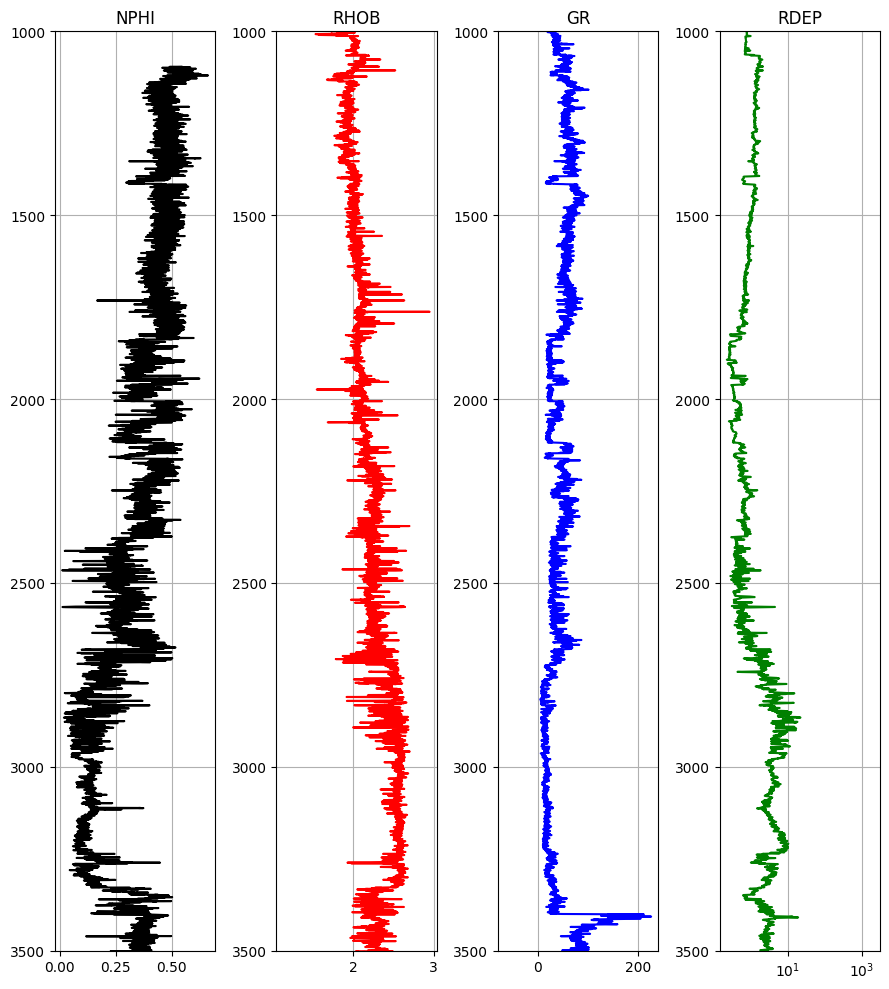

In [ ]:
#well log data visualization
logs=["NPHI","RHOB","GR","RDEP"]
color=["black",'red','blue','green']

plt.figure(figsize=(9,10))
for i in range(4):
  plt.subplot(1,4,i+1)
  if logs[i]=="RDEP":
    plt.semilogx(well[logs[i]],well['DEPT'],color=color[i])  #semi log for resistivity
  else:
    plt.plot(well[logs[i]],well['DEPT'],color=color[i])    #normal plot

  plt.title(logs[i])
  plt.ylim(3500,1000)
  plt.grid()

plt.tight_layout()
plt.show()

**Trajectory data**

In [ ]:
#loading data
traj=pd.read_csv(trajectory_path)
traj.head()

,azi,md,tvd,incl,dispNs,dispEw,TVD_calc,surfNs,surfEw
0,0.00,0.0,0.0000,0.00,-3.1700,3.5300,0.000000,6.478560e+06,435053.550000
1,0.00,145.9,145.9000,0.00,-3.1700,3.5300,145.900000,6.478560e+06,435053.550000
2,253.69,153.4,153.4000,0.15,-3.1728,3.5206,153.399991,6.478560e+06,435053.540578
3,146.02,234.2,234.1996,0.28,-3.3662,3.5294,234.199630,6.478560e+06,435053.549412
4,136.21,274.6,274.5978,0.78,-3.6465,3.7749,274.597780,6.478560e+06,435053.794881


In [ ]:
#well trajectory data visualization
x=traj['surfEw'].values
y=traj['surfNs'].values
z=traj['tvd'].values
fig=px.scatter_3d(traj,x='surfEw',y='surfNs',z='tvd', color='incl')
fig.update_scenes(zaxis_autorange='reversed')
fig.show()